In [35]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<img src='figure/shwave.png' width=600>

In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [14]:
import athena_read
data = athena_read.athdf('HGB.out2.00000.athdf')
print('x-bounds: {0} to {1}'.format(data['x1f'][10],data['x1f'][11]))
print('y-bounds: {0} to {1}'.format(data['x2f'][20],data['x2f'][21]))
print('z-bounds: {0} to {1}'.format(data['x3f'][30],data['x3f'][31]))
#print('total energy: {0}'.format(data['Etot'][30,20,10]))
print('x-velocity: {0}'.format(data['vel1'][30,20,10]))
print('x-cc-B: {0}'.format(data['B2'][30,20,10]))

x-bounds: -0.1875 to -0.15625
y-bounds: 0.125 to 0.15625
z-bounds: 0.4375 to 0.46875
x-velocity: -4.23654182669e-06
x-cc-B: 0.200001001358


In [28]:
data['B2'].shape
print (data['x1f']+1)[0:-1]

[ 0.5      0.53125  0.5625   0.59375  0.625    0.65625  0.6875   0.71875
  0.75     0.78125  0.8125   0.84375  0.875    0.90625  0.9375   0.96875
  1.       1.03125  1.0625   1.09375  1.125    1.15625  1.1875   1.21875
  1.25     1.28125  1.3125   1.34375  1.375    1.40625  1.4375   1.46875]


## 1. compressive magnetic shwave test
### $\delta B_y = \int_V 2(B_y- \hat{B}_y) cos(\mathbf{k}(t)\cdot \mathbf{x})$    (Stone & Gardiner 2010, Eqn 64)
### where $\hat{B}_y = 0.2-0.15\Omega_0 t$ and $\mathbf{k}(t)= (-2+q\Omega_0 t, 1, 1) (2\pi/L)$

0.0
0.31416
0.62832
0.94248
1.25664
1.5708
1.88496
2.19912
2.51328
2.82744


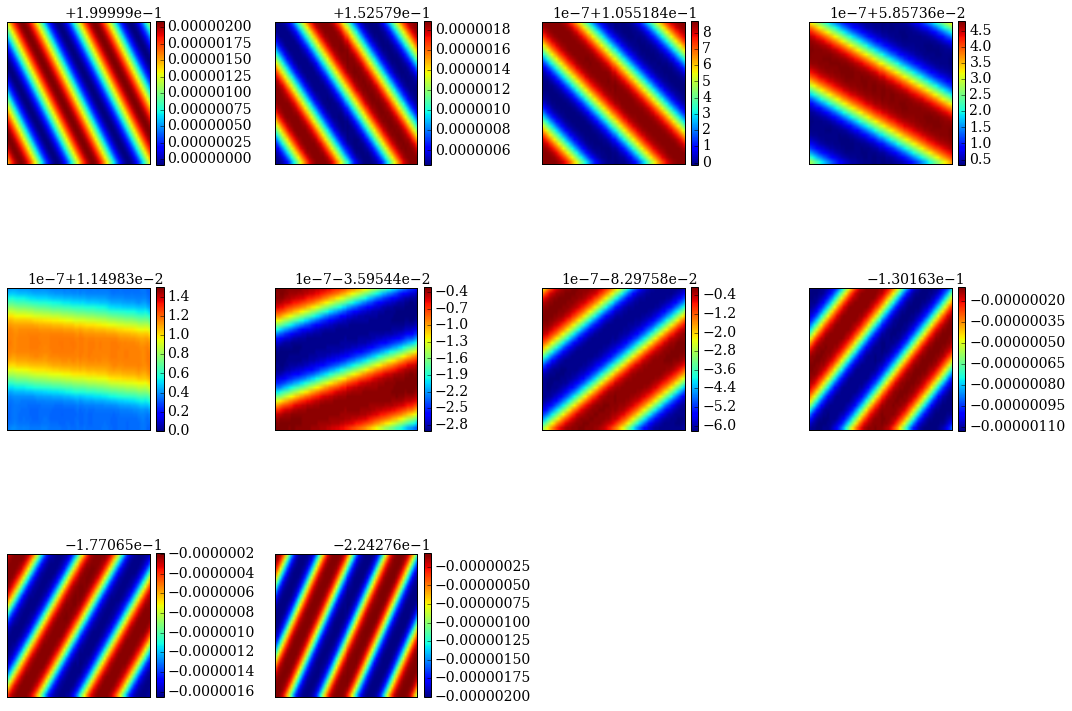

In [2]:
import athena_read  as ath
from shwave import cn4, cn5

dirpath = '../athena/bin/mshwave.r64/'
basename = dirpath+'HGB.out2'


first_time = True
# load snapshots and save to png
ts=0; te=500; dt = 0.0062832
q = 1.5; omg = 1.0; cs=1.0
nplot = (te - ts)/50
cnt = 1
ngrid_y = 4
ngrid_x = nplot/4+1
pylab.rcParams['figure.figsize'] = (15, 15.0*ngrid_x/ngrid_y)
fraction=0.046; pad=0.04
bbmax=0.8
for i in np.arange(ts,te,50):
  data = ath.athdf(basename+'.'+cn5(i)+'.athdf')
  time = i*dt
  Bhat = 0.2-0.15*omg*time
  print time
  if(first_time):
      x1 = data['x1f']; x2 = data['x2f']; x3 = data['x3f']
      dx1 = x1[1]-x1[0]; dx2 = x2[1]-x2[0]; dx3 = x3[1]-x3[0]
      x1 = (x1+0.5*dx1)[0:-1]; x2 = (x2+0.5*dx2)[0:-1]; x3 = (x3+0.5*dx3)[0:-1]
      first_time = False
  plt.subplot(ngrid_x,ngrid_y,cnt)
  
  if(i==200):
    bmin = 1.14983e-2; bmax = bmin+1.5e-7
    plt.imshow((data['B2'][6,:,:]),aspect=2,clim=[bmin,bmax])
  else:
    plt.imshow((data['B2'][6,:,:]),aspect=2) #,clim=[-bbmax,bbmax])
    
  #plt.title('t='+str(time))
  plt.xticks([])
  plt.yticks([])
  plt.colorbar(fraction=fraction, pad=pad)
  cnt += 1

plt.tight_layout()
#plt.axes().set_aspect('equal')
plt.show()
pylab.rcParams['figure.figsize'] = (15, 15.0)

### comparison with athena4

time =  0.0
time =  0.3161322
time =  0.6298745
time =  0.942841
time =  1.256677
time =  1.57303
time =  1.886507
time =  2.201091
time =  2.513773
time =  2.828514


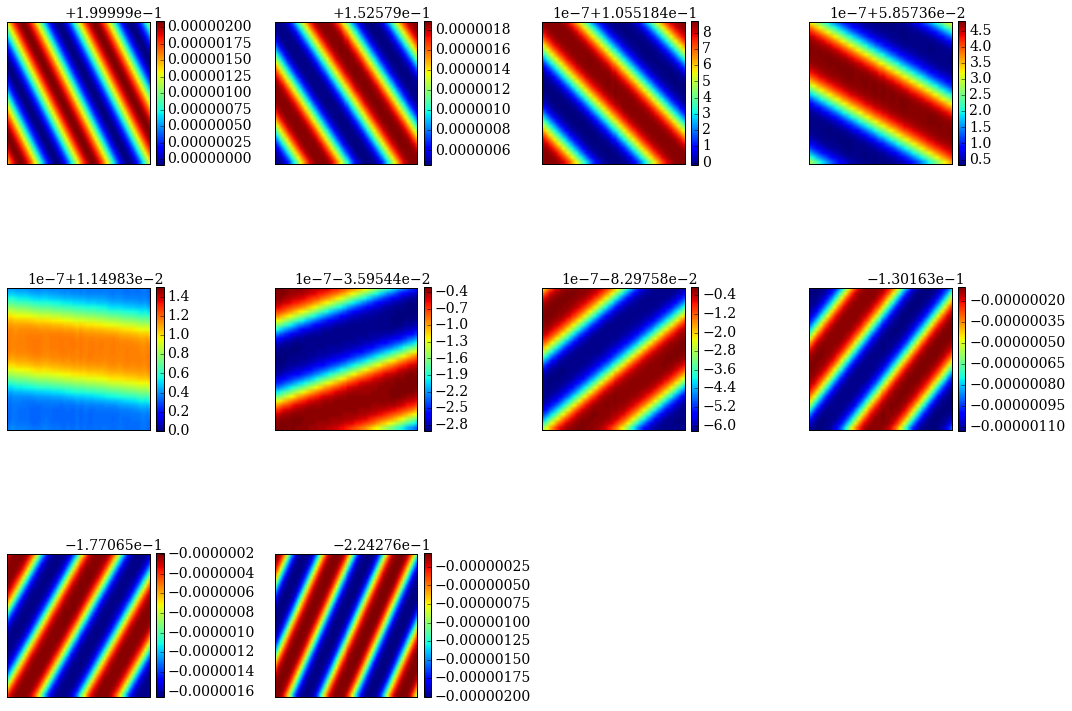

In [42]:
import athena4_read as ath4
from shwave import cn4, cn5

dirpath = '../athena4.0/mshwave.r64/'
basename = dirpath+'HGB.'



# load snapshots and save to png
ts=0; te=500; dt = 0.0062832
q = 1.5; omg = 1.0; cs=1.0
nplot = (te - ts)/50
cnt = 1
ngrid_y = 4
ngrid_x = nplot/4+1
pylab.rcParams['figure.figsize'] = (15, 15.0*ngrid_x/ngrid_y)
fraction=0.046; pad=0.04
bbmax=0.8
for i in np.arange(ts,te,50):
  filename=basename+cn4(i)+'.vtk'
  t,x,y,z,data=ath4.vtk(filename)
  #bx = data['cell_centered_B'][...,0]
  by = data['cell_centered_B'][...,1]
  #bz = data['cell_centered_B'][...,2]
  plt.subplot(ngrid_x,ngrid_y,cnt)
  Bhat = 0.2-0.15*omg*t
  if(i==200):
    bmin = 1.14983e-2; bmax = bmin+1.5e-7
    plt.imshow(by[6,:,:],aspect=2,clim=[bmin,bmax])
  else:
    plt.imshow(by[6,:,:],aspect=2) #,clim=[-bbmax,bbmax])
    
  #plt.title('t='+str(time))
  plt.xticks([])
  plt.yticks([])
  plt.colorbar(fraction=fraction, pad=pad)
  cnt += 1

plt.tight_layout()
#plt.axes().set_aspect('equal')
plt.show()
pylab.rcParams['figure.figsize'] = (15, 15.0)

### left to right: athena++ with both e2 and e3 correction,  only e2 correction, and athena4.0
<img src="figure/mshwave_200_e2e3.png" style="width:300px; height:300px;  float:left;" />
<img src="figure/mshwave_200_e2.png" style="width:300px; height:300px;  float:left;" />
<img src="figure/mshwave_200_athena4.png" style="width:300px; height:300px;  float:left;" />

### at a different time t=213
<img src="figure/mshwave_213_e2e3.png" style="width:300px; height:300px;  float:left;" />
<img src="figure/mshwave_213_e2.png" style="width:300px; height:300px;  float:left;" />
<img src="figure/mshwave_213_athena4.png" style="width:300px; height:300px;  float:left;" />

### calculate $\delta B_y$  the perturbations of $B_y$  for athena++

In [3]:
from shwave import cn4, cn5
dirpath = '../athena/bin/mshwave.r64/'
basename = dirpath+'HGB.out2'
ntime = 501 
tend = 3.1416
time = np.linspace(0, tend,ntime)
dB2  = np.zeros(ntime)
B2_real = np.zeros(ntime)
Bhat_real = np.zeros(ntime)
first_time= True
q = 1.5; omg = 1.0; L = .5; k0 = 2.0*np.pi/L
for i in np.arange(0,ntime):
    data = ath.athdf(basename+'.'+cn5(i)+'.athdf')
    if(first_time):
      x1 = data['x1f']; x2 = data['x2f']; x3 = data['x3f']
      dx1 = x1[1]-x1[0]; dx2 = x2[1]-x2[0]; dx3 = x3[1]-x3[0]
      x1 = (x1+0.5*dx1)[0:-1]; x2 = (x2+0.5*dx2)[0:-1]; x3 = (x3+0.5*dx3)[0:-1]
      xv,yv,zv = np.meshgrid(x1,x2,x3,indexing='xy') # (ny,nx,nz)
      xv = np.transpose(xv,(2,0,1))
      yv = np.transpose(yv,(2,0,1))
      zv = np.transpose(zv,(2,0,1))
      first_time = False
    #print xv.shape, yv.shape, zv.shape
    kx = -2.0+q*omg*time[i]; ky = 1.0; kz = 1.0
    cosktx = np.cos(k0*(kx*xv+ky*yv+kz*zv))
    Bhat = 0.2-0.15*omg*time[i]
    B2 = data['B2']
    dB2[i] = np.average(2.0*(B2-Bhat)*cosktx)
    B2_real[i] = np.average(B2*cosktx)
    Bhat_real[i] = np.average(Bhat*cosktx)
    #print dB2[i]
    
# store dB2;
import cPickle as pickle
pickle.dump([time,dB2], open( "mshwave_dB2.p", "wb" ))

### $\delta B_y$ for athena4

In [4]:
import athena4_read as ath4
from shwave import cn4, cn5

dirpath = '../athena4.0/mshwave.r64/'
basename = dirpath+'HGB.'

ntime = 501 
tend = 3.1416
time = np.linspace(0, tend,ntime)
dB2  = np.zeros(ntime)
B2_real = np.zeros(ntime)
Bhat_real = np.zeros(ntime)
first_time= True
q = 1.5; omg = 1.0; L = .5; k0 = 2.0*np.pi/L
for i in np.arange(0,ntime):
  filename=basename+cn4(i)+'.vtk'
  t,x1,x2,x3,data = ath4.vtk(filename)
  time[i] = t
  #bx = data['cell_centered_B'][...,0]
  #by = data['cell_centered_B'][...,1]
  if(first_time):
      xv,yv,zv = np.meshgrid(x1,x2,x3,indexing='xy') # (ny,nx,nz)
      xv = np.transpose(xv,(2,0,1))
      yv = np.transpose(yv,(2,0,1))
      zv = np.transpose(zv,(2,0,1))
      print x1.shape, x2.shape, x3.shape
      print xv.shape
      first_time = False
    #print xv.shape, yv.shape, zv.shape
  kx = -2.0+q*omg*time[i]; ky = 1.0; kz = 1.0
  cosktx = np.cos(k0*(kx*xv+ky*yv+kz*zv))
  Bhat = 0.2-0.15*omg*t
  B2 = data['cell_centered_B'][...,1]
  dB2[i] = np.average(2.0*(B2-Bhat)*cosktx)
  #print dB2[i]
    
# store dB2;
import cPickle as pickle
pickle.dump([time,dB2], open( "mshwave_athena4_dB2.p", "wb" ))

time =  0.0
(64,) (32,) (32,)
(32, 32, 64)
time =  0.00689385
time =  0.01378908
time =  0.02068568
time =  0.02528417
time =  0.03218305
time =  0.03908328
time =  0.04598486
time =  0.05058666
time =  0.05749047
time =  0.06439562
time =  0.0713021
time =  0.07590715
time =  0.08281583
time =  0.08972581
time =  0.09433319
time =  0.1012453
time =  0.1081588
time =  0.1150735
time =  0.1196841
time =  0.1266009
time =  0.1335191
time =  0.1404385
time =  0.1450521
time =  0.1519736
time =  0.1588964
time =  0.1635122
time =  0.170437
time =  0.1773631
time =  0.1842903
time =  0.1889092
time =  0.1958385
time =  0.202769
time =  0.20739
time =  0.2143224
time =  0.2212561
time =  0.228191
time =  0.2328149
time =  0.2397517
time =  0.2466897
time =  0.2536288
time =  0.2582556
time =  0.2651966
time =  0.2721388
time =  0.2767676
time =  0.2837117
time =  0.2906569
time =  0.2976032
time =  0.3022347
time =  0.3091829
time =  0.3161322
time =  0.3207656
time =  0.3277167
time =  0.33

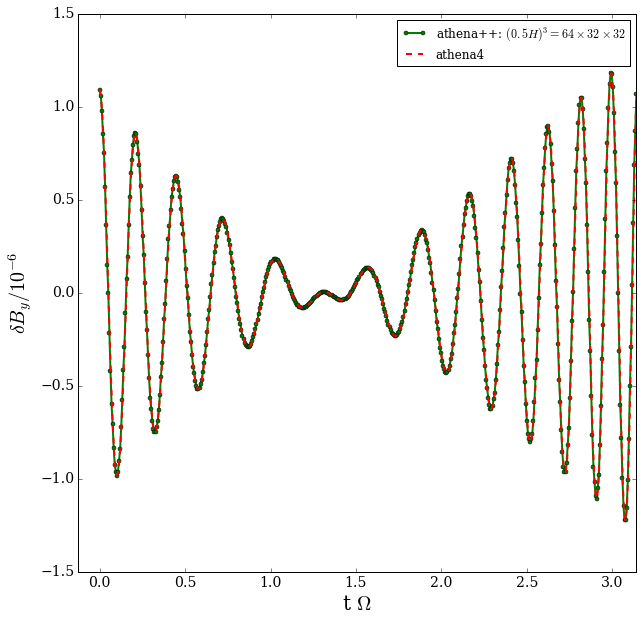

In [5]:
pylab.rcParams['figure.figsize'] = (10, 10.0)

ttmp,dB2tmp = pickle.load(open( "mshwave_dB2.p", "rb" ))
plt.plot(ttmp,dB2tmp*1e6,'g-o',markersize=4)

ttmp,dB2tmp = pickle.load(open( "mshwave_athena4_dB2.p", "rb" ))
plt.plot(ttmp,dB2tmp*1e6,'r--',markersize=2)
#plt.plot(time,B2_real*1e6,'g--')
#plt.plot(time,Bhat_real*1e6, 'r--')

plt.xlabel('t $\Omega$',fontsize=20)
plt.ylabel('$\delta B_y/10^{-6}$',fontsize=20)
plt.ylim([-1.5,1.5])
plt.xlim([-0.125,np.pi])
plt.legend([r'athena++: $(0.5 H)^3 = 64\times 32\times 32$','athena4'])
plt.show()

## 2. nonlinear MRI 

In [4]:
import athena_read  as ath
from shwave import cn4, cn5

dirpath = '../athena/bin/ZNF.r32/'
dirpath = '../athena/bin/ZNF.r64/'
basename = dirpath+'HGB.out2'
ntime = 501; dt= 0.251327408
tend = 125.663704
time = np.linspace(0, tend,ntime)
B1  = np.zeros(ntime)
B2  = np.zeros(ntime)
B3 =  np.zeros(ntime)
B1B2 = np.zeros(ntime)
Bsqr = np.zeros(ntime)


q = 1.5; omg = 1.0; L = .5; k0 = 2.0*np.pi/L
for i in np.arange(0,ntime):
    data = ath.athdf(basename+'.'+cn5(i)+'.athdf')
    B1[i] = np.average(data['B1'])
    B2[i] = np.average(data['B2'])
    B3[i] = np.average(data['B3'])
    B1B2[i] = np.average(data['B1']*data['B2'])
    Bsqr[i] = 0.5*np.average(data['B1']**2+data['B2']**2+data['B3']**2)
    
# store averaged B-field;
import cPickle as pickle
pickle.dump([time,B1,B2,B3,B1B2,Bsqr], open( "znf_r64_bavg_t.p", "wb" ))

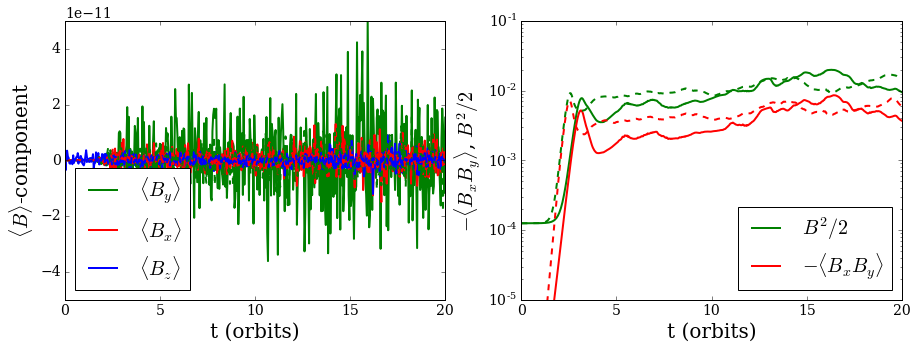

In [5]:
import cPickle as pickle
pylab.rcParams['figure.figsize'] = (15, 5.0)

time,B1,B2,B3,B1B2,Bsqr = pickle.load(open( "znf_bavg_t.p", "rb" ))
time_64,B1_64,B2_64,B3_64,B1B2_64,Bsqr_64 = pickle.load(open( "znf_r64_bavg_t.p", "rb" ))
time /=(np.pi*2.)
time_64 /= (np.pi*2.)

plt.subplot(121)
plt.plot(time,B2,'g-',markersize=4)
plt.plot(time,B1,'r-',markersize=4)
plt.plot(time,B3,'b-',markersize=4)
#plt.plot(time_64,B2_64,'g--',markersize=2)
#plt.plot(time_64,B1_64,'r--',markersize=2)
#plt.plot(time_64,B3_64,'b--',markersize=2)
plt.xlabel('t (orbits)',fontsize=20)
plt.ylabel(r'$\langle B\rangle$-component',fontsize=20)
plt.ylim([-5e-11,5e-11])
#plt.xlim([-0.125,np.pi])
plt.legend([r'$\langle B_y\rangle$',r'$\langle B_x\rangle$', 
            r'$\langle B_z\rangle$'],fontsize=20,loc=0)



plt.subplot(122)
plt.semilogy(time,Bsqr,'g-')
plt.semilogy(time,-B1B2,'r-')
plt.semilogy(time_64,Bsqr_64,'g--')
plt.semilogy(time_64,-B1B2_64,'r--')
plt.xlabel('t (orbits)',fontsize=20)
plt.ylabel(r'$-\langle B_xB_y\rangle$, $B^2/2$',fontsize=20)
plt.ylim([1e-5,0.1])
plt.legend([r'$B^2/2$',r'$-\langle B_x B_y\rangle$'],loc=4,fontsize=20)

plt.show()

## 3. Field loop in shearing box
$3\times 8\times 2$ box, resolution (96x256x4), $c_s=\Omega=1.0$; 

the initial origin of loop at $(0,2.5,0)$, initial $\mathbf{v} = (c_s,0,0)$, initial $|B|=10^{-3}$.  

The following snapshots show the magnitude of magnetic field at t=0, 0.3, 0.7 and 1 orbit.

<img src="figure/floop_t=0.png" style="width:160px; height:300px;  float:left;" />
<img src="figure/floop_t=18.png" style="width:160px; height:300px;  float:left;" />
<img src="figure/floop_t=43.png" style="width:160px; height:300px;  float:left;" />
<img src="figure/floop_t=63.png" style="width:160px; height:300px;  float:left;" />


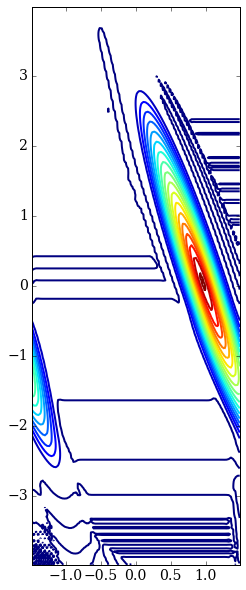

In [31]:
import athena_read  as ath
from shwave import cn4, cn5

dirpath = '../athena/bin/field_loop/'
basename = dirpath+'Loop.out2'
ntime = 18; 
data = ath.athdf(basename+'.'+cn5(ntime)+'.athdf')
B1 = data['B1'][0,:,:]
B2 = data['B2'][0,:,:]
x1 = data['x1f']
x2 = data['x2f']
dx1 = x1[1]-x1[0]; dx2 = x2[1]-x2[0]
x1 = (x1+0.5*dx1)[0:-1]; x2 = (x2+0.5*dx2)[0:-1];
nx = len(x1); ny = len(x2)
x,y = np.meshgrid(x1,x2)
pylab.rcParams['figure.figsize'] = (8, 10.0)
def flines2d(nlev):
  vecpot = np.zeros((ny,nx))
  for j in range(1,ny):
    vecpot[j,0] = vecpot[j-1,0] + dx2*B1[j,0]
  for i in range(1,nx):
    vecpot[:,i] = vecpot[:,i-1] - dx1*B2[:,i]

  plt.figure()
  CS = plt.contour(x, y, vecpot,nlev)
  #plt.clabel(CS, inline=1, fontsize=10)
  plt.axes().set_aspect('equal')
  #plt.title('Simplest default with labels')
  return
    

flines2d(20)